In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('Yulu_Hypothesis_Testing_bike_sharing.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
### No null values found
df.isnull().sum()/len(df)*100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


### Column Profiling:

    -> datetime: datetime
    -> season: season (1: spring, 2: summer, 3: fall, 4: winter)
    -> holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    -> workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
    -> weather:
            1: Clear, Few clouds, partly cloudy, partly cloudy
            2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    -> temp: temperature in Celsius
    -> atemp: feeling temperature in Celsius
    -> humidity: humidity
    -> windspeed: wind speed
    -> casual: count of casual users
    -> registered: count of registered users
    -> count: count of total rental bikes including both casual and registered

In [9]:
#unique values and its count for each columns
for i in df.columns:
    print(f'\033[1m{i}\033[0m : {df[i].unique()}, \033[1mCount\033[0m : {len(df[i].unique())} \n')

datetime : ['2011-01-01T00:00:00.000000000' '2011-01-01T01:00:00.000000000'
 '2011-01-01T02:00:00.000000000' ... '2012-12-19T21:00:00.000000000'
 '2012-12-19T22:00:00.000000000' '2012-12-19T23:00:00.000000000'], Count : 10886 

season : [1 2 3 4], Count : 4 

holiday : [0 1], Count : 2 

workingday : [0 1], Count : 2 

weather : [1 2 3 4], Count : 4 

temp : [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ], Count : 49 

atemp : [14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665

In [10]:
df.describe().drop('count').loc[:,'temp':'count']

,temp,atemp,humidity,windspeed,casual,registered,count
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
### We have the data of number of purchases at every hour on most of the days from 2011 and 2012 years. 
print(df['datetime'].dt.year.unique())
print(df['datetime'].dt.month.unique())
print(df['datetime'].dt.time.unique())

[2011 2012]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[datetime.time(0, 0) datetime.time(1, 0) datetime.time(2, 0)
 datetime.time(3, 0) datetime.time(4, 0) datetime.time(5, 0)
 datetime.time(6, 0) datetime.time(7, 0) datetime.time(8, 0)
 datetime.time(9, 0) datetime.time(10, 0) datetime.time(11, 0)
 datetime.time(12, 0) datetime.time(13, 0) datetime.time(14, 0)
 datetime.time(15, 0) datetime.time(16, 0) datetime.time(17, 0)
 datetime.time(18, 0) datetime.time(19, 0) datetime.time(20, 0)
 datetime.time(21, 0) datetime.time(22, 0) datetime.time(23, 0)]


In [12]:
print(df['datetime'].dt.month.value_counts()/(24*30))

5     1.266667
6     1.266667
7     1.266667
8     1.266667
12    1.266667
10    1.265278
11    1.265278
4     1.262500
9     1.262500
2     1.251389
3     1.251389
1     1.227778
Name: datetime, dtype: float64


In [13]:
df.groupby(df['datetime'].dt.year)['count'].sum()

datetime
2011     781979
2012    1303497
Name: count, dtype: int64

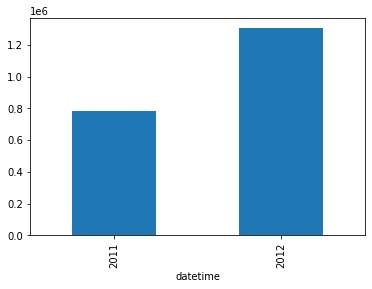

In [14]:
### Bivariate analysis of total vehicle count for 2011 and 2012
df.groupby(df['datetime'].dt.year)['count'].sum().plot(kind = 'bar')
plt.show()

In [15]:
np.arange(0,24,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

Jan


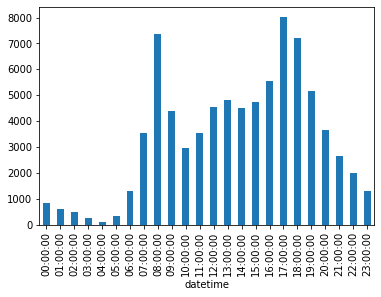

Feb


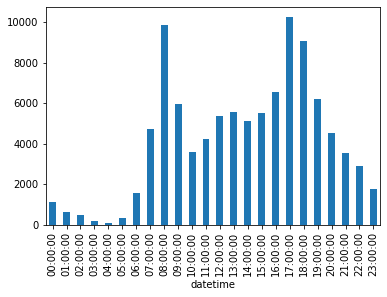

Mar


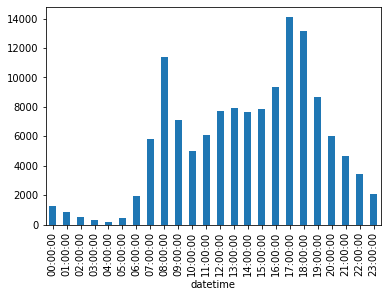

Apr


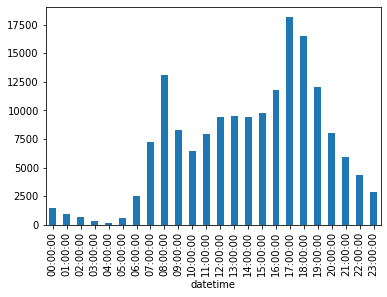

May


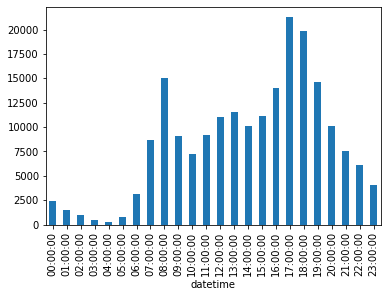

Jun


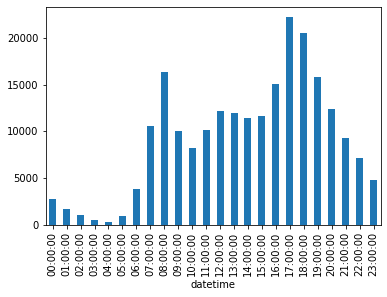

Jul


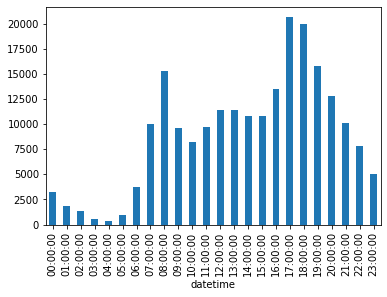

Aug


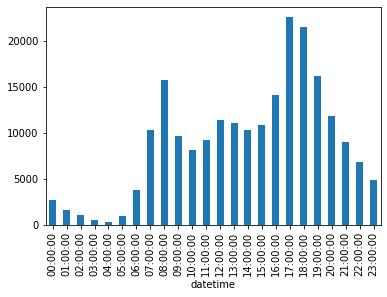

Sep


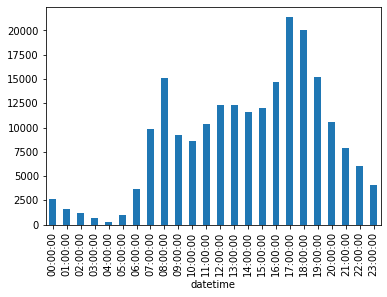

Oct


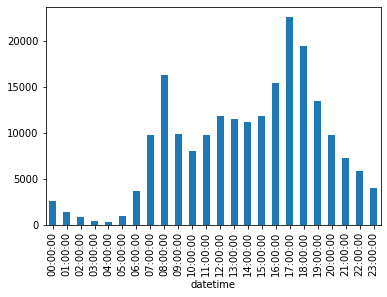

Nov


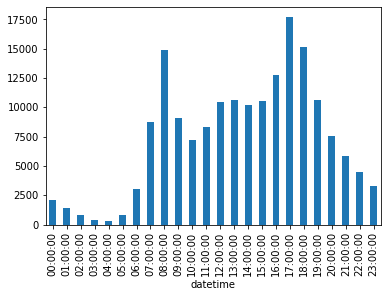

Dec


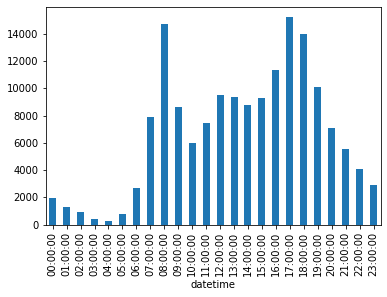

In [16]:
### Bivariate analysis of total vehicle count across all hours for all the months 2011 and 2012 combined
d={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
for i in range(1,13):
    print(f'\033[1m{d[i]}\033[0m')
    df[df['datetime'].dt.month == i].groupby(df['datetime'].dt.time)['count'].sum().plot(kind = 'bar')
    plt.show()

In [17]:
df.groupby(df['datetime'].dt.time)['count'].sum().sort_values()

datetime
04:00:00      2832
03:00:00      5091
05:00:00      8935
02:00:00     10259
01:00:00     15372
00:00:00     25088
06:00:00     34698
23:00:00     40816
22:00:00     60911
21:00:00     79057
10:00:00     79667
11:00:00     95857
07:00:00     96968
09:00:00    100910
20:00:00    104204
14:00:00    111010
15:00:00    115960
12:00:00    116968
13:00:00    117551
19:00:00    143767
16:00:00    144266
08:00:00    165060
18:00:00    196472
17:00:00    213757
Name: count, dtype: int64

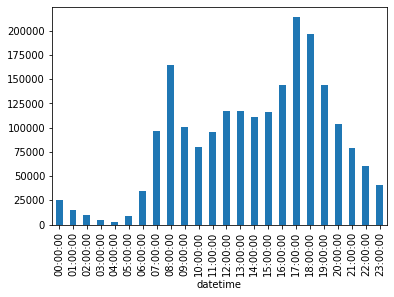

In [18]:
### Bivariate analysis of total vehicle count across all the hours

df.groupby(df['datetime'].dt.time)['count'].sum().plot(kind = 'bar')
plt.show()

In [19]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

In [20]:
### Getting total vehicle rental count for each date
df1 = df.groupby([df['datetime'].dt.date, 'workingday'])['count'].sum().to_frame().reset_index()

In [21]:
df1.head()

,datetime,workingday,count
0,2011-01-01,0,985
1,2011-01-02,0,801
2,2011-01-03,1,1349
3,2011-01-04,1,1562
4,2011-01-05,1,1600


<AxesSubplot:>

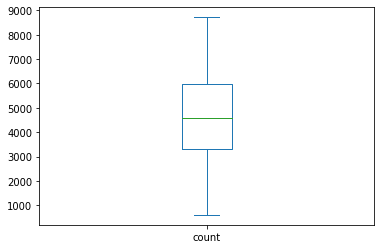

In [22]:
# no outliers found
df1['count'].plot(kind = 'box')

In [23]:
df1.shape

(456, 3)

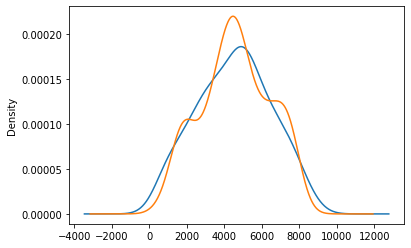

In [24]:
# Kde curves
df1[df1['workingday'] == 0]['count'].plot(kind = 'kde')
df1[df1['workingday'] == 1]['count'].plot(kind = 'kde')
plt.show()

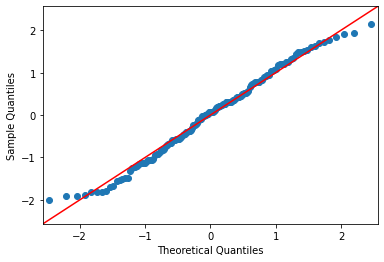

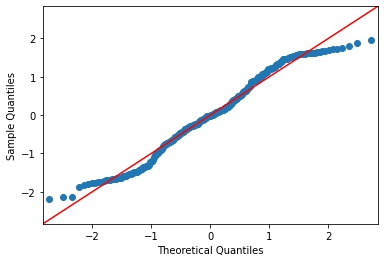

In [25]:
# Both almost follow a normal dist
sm.qqplot(df1[df1['workingday'] == 0]['count'], fit = True, line = '45')
sm.qqplot(df1[df1['workingday'] == 1]['count'], fit = True, line = '45')
plt.show()

In [26]:
### 2-sample T-test to check if Working Day has an effect on the number of electric cycles rented

#let significance level(α) = 5%(0.05)

# 0 - Non workind day
# 1 - working day

# Ho = mean difference between 2 samples is almost close to zero (Independent if we fail to reject Ho)
# Ha = large positive or large negative mean difference between 2 samples (Dependent if reject Ho)
sample1 = df1[df1['workingday'] == 0]['count']
sample2 = df1[df1['workingday'] == 1]['count']

In [27]:
# pvalue = 0.65 > 0.05 (α)
# Hence, we fail to reject Ho. There is hardly any difference in means. Hence, we can conclude that working day does not have
# any effect on electric vehicle rental count
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-0.44477221614881995, pvalue=0.656696335987859)

### Chi-square test to check if Weather is dependent on the season

In [28]:
pd.crosstab(df['weather'], df['season'], margins = True)

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


In [29]:
# A non parametric test with only one assumption - 
# The data in the cells should be frequencies, or counts rather than percentages or some other transformation of the data. 

#let significance level(α) = 5%(0.05)

# Ho= Test statistic is close to zero. No association between the two variables.(Independent if we fail to reject Ho - Pval > α)
# Ha= large positive or large negative test statistic.There is an association between the two variables.(Dependent if reject Ho)
t_stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['weather'], df['season']))

In [30]:
p, t_stat, dof, expected

(1.5499250736864862e-07,
 49.15865559689363,
 9,
 array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
        [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
        [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
        [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

In [31]:
# P <<<< α. Hence, we reject Ho, with a conclusion that there is an association or dependency between weather and season.
p

1.5499250736864862e-07

### ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

In [32]:
df[['season', 'weather', 'count']]

,season,weather,count
0,1,1,16
1,1,1,40
2,1,1,32
3,1,1,13
4,1,1,1
...,...,...,...
10881,4,1,336
10882,4,1,241
10883,4,1,168
10884,4,1,129


In [33]:
# We have to do a 2-way Anova as there are 4 different weather types for each season
df.groupby('season')['weather'].value_counts()

season  weather
1       1          1759
        2           715
        3           211
        4             1
2       1          1801
        2           708
        3           224
3       1          1930
        2           604
        3           199
4       1          1702
        2           807
        3           225
Name: weather, dtype: int64

In [34]:
# Ho = No. of cycles rented is similar in different Weather and season (No dependency)
# Ha = No. of cycles rented is different in different Weather and season(dependency exists)

#let significance level(α) = 5%(0.05)

In [35]:
ano = ols('count~season+weather', data = df).fit()

In [36]:
# From the p values for season and weather, we can say that pval <<<<<< 0.05. 
# Hence, there is dependency and No. of cycles rented is different in different Weather and season.
sm.stats.anova_lm(ano, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
season,1.0,9.540914e+06,9.540914e+06,303.976001,3.652156e-67
weather,1.0,6.046576e+06,6.046576e+06,192.645484,1.970772e-43
Residual,10883.0,3.415854e+08,3.138706e+04,NaN,NaN


### Bivariate analysis of dependent count vs independent temp, atemp, humidity and windspeed. 

In [37]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [38]:
df['temp'] = pd.cut(df['temp'], bins = np.arange(0, 44, 2))
df['atemp'] = pd.cut(df['atemp'], bins = np.arange(0, 48, 2))
df['humidity'] = pd.cut(df['humidity'], bins = np.arange(0, 110, 10))
df['windspeed'] = pd.cut(df['windspeed'], bins = np.arange(0, 55, 5))

In [39]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

temp vs count


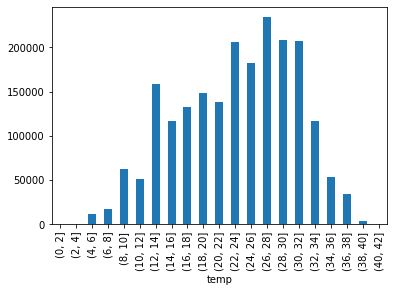

atemp vs count


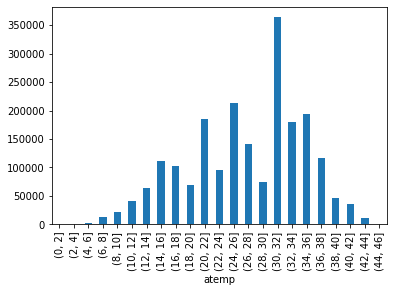

humidity vs count


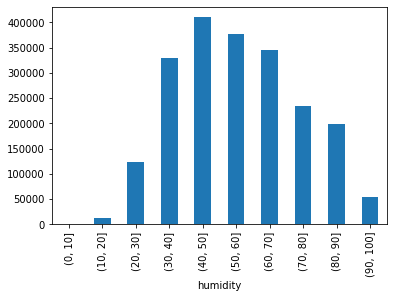

windspeed vs count


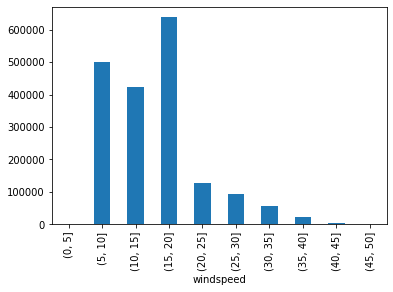

In [40]:
for i in df.columns[5:9]:
    print(f'\033[1m{i} vs count\033[0m')
    df.groupby(i)['count'].sum().plot(kind = 'bar')
    plt.xticks(rotation=90)
    plt.show()